<a href="https://colab.research.google.com/github/shubhangimis1234/shubhumishra/blob/main/Project3_svm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# steps
1. importing the libraries
2. Importing the datasets
3. Data cleaning , Data Exploration,
 Data Manipulation, Data visualization
4. EDA- Exploratory Data Analysis
5. splitting the dataset
6. Choosing the model
7. Training the model
8. Testing the model
9. Model Evaluation
10. [Optional]  Export the dataset
into the.csvformat

# New section

# Importing library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Importing datasets

In [ ]:
df = pd.read_csv("/content/archive (18).zip")


In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.shape

(4653, 9)

In [ ]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
# checking for null values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
df.Education

0       Bachelors
1       Bachelors
2       Bachelors
3         Masters
4         Masters
          ...    
4648    Bachelors
4649      Masters
4650      Masters
4651    Bachelors
4652    Bachelors
Name: Education, Length: 4653, dtype: object

In [ ]:
df.Education.value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [ ]:
df.Gender.value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [ ]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
df.ExperienceInCurrentDomain.value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

In [ ]:
df.Age.value_counts()

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

In [ ]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
min_Age = np.min(df['Age'])


In [ ]:
min_Age


22

In [ ]:
max_Age = np.max(df['Age'])id


In [ ]:
max_Age

41

In [ ]:
dumm = pd.DataFrame(df)




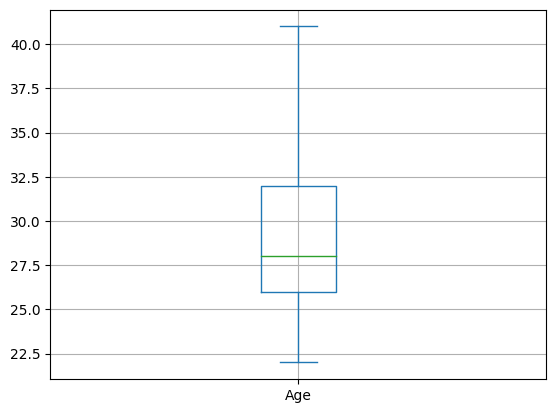

In [ ]:
# Boxplot for 'Gender'
dumm['Age'].plot.box()
plt.grid()
plt.show()

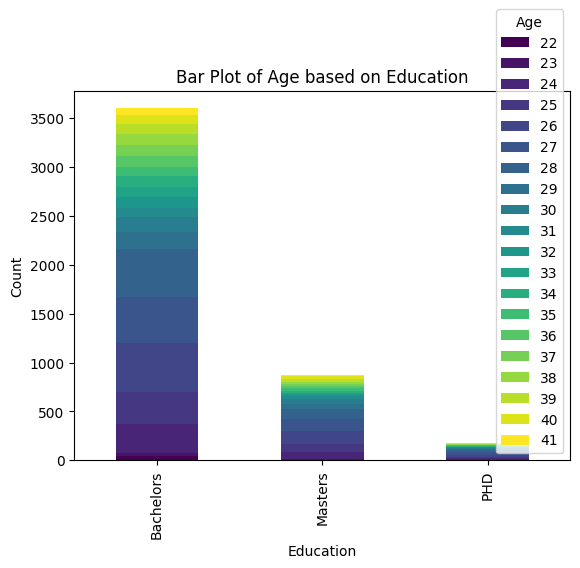

In [ ]:
df.groupby(['Education', 'Age']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Bar Plot of Age based on Education')
plt.show()


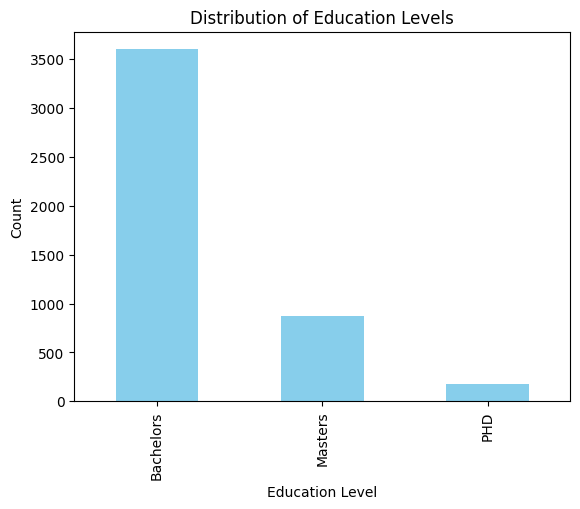

In [ ]:

import matplotlib.pyplot as plt

# Count of individuals in each education level
education_counts = df['Education'].value_counts()

# Plot bar chart
education_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()


#  
Distribution of Gender

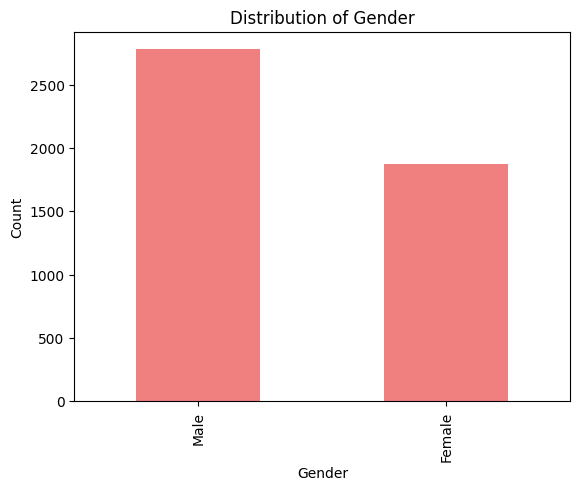

In [ ]:
# Count of individuals in each gender
gender_counts = df['Gender'].value_counts()

# Plot bar chart
gender_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


#Average Experience in Current Domain based on Education:

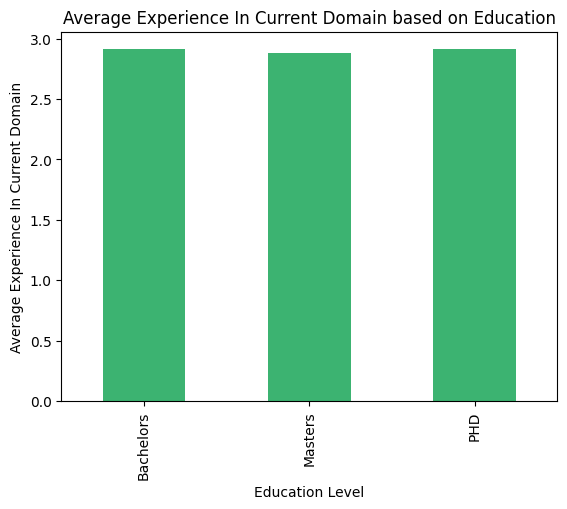

In [ ]:
# Average experience in the current domain for each education level
avg_experience_by_education = df.groupby('Education')['ExperienceInCurrentDomain'].mean()

# Plot bar chart
avg_experience_by_education.plot(kind='bar', color='mediumseagreen')
plt.xlabel('Education Level')
plt.ylabel('Average Experience In Current Domain')
plt.title('Average Experience In Current Domain based on Education')
plt.show()


# Leave or Not Distribution:

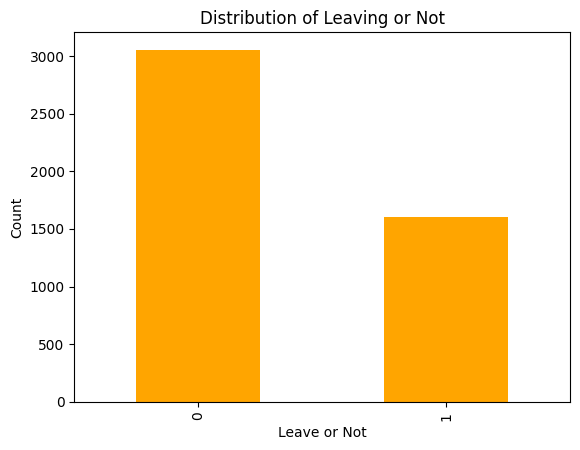

In [ ]:
# Count of individuals who left or not
leave_counts = df['LeaveOrNot'].value_counts()

# Plot bar chart
leave_counts.plot(kind='bar', color='orange')
plt.xlabel('Leave or Not')
plt.ylabel('Count')
plt.title('Distribution of Leaving or Not')
plt.show()
